#Analisis de modelos de clasificacion

##Importacion de librerias

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [105]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url = '/content/drive/MyDrive/Machine_learning/EV2/models_results/classification_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    classification = pd.read_parquet(url)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados exitosamente!


##Informacion general

In [106]:
print(f'Dimensiones iniciales: {classification.shape}')

Dimensiones iniciales: (5, 10)


In [107]:
print(f'Variables disponibles: {list(classification.columns)}')

Variables disponibles: ['Model', 'Best_Params', 'Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'Best_Threshold', 'CV_AUC_Mean', 'CV_AUC_Std']


In [108]:
print("Vista previa de los resultados de clasificación:")
display(classification)

Vista previa de los resultados de clasificación:


,Model,Best_Params,Accuracy,F1_Score,Precision,Recall,AUC_ROC,Best_Threshold,CV_AUC_Mean,CV_AUC_Std
0,random_forest,"{'model__n_estimators': 200, 'model__min_sampl...",0.336916,0.503544,0.336545,0.999523,0.489068,0.419990,0.489764,0.006043
1,logistic,"{'model__solver': 'liblinear', 'model__penalty...",0.336435,0.503481,0.336435,1.000000,0.516039,0.486996,0.513157,0.007867
2,gradient_boosting,"{'model__subsample': 0.7, 'model__n_estimators...",0.336435,0.503481,0.336435,1.000000,0.509026,0.461675,0.497388,0.008947
3,svm,"{'model__penalty': 'l1', 'model__learning_rate...",0.336435,0.503481,0.336435,1.000000,0.500000,0.466892,0.513439,0.008218
4,lightgbm,"{'model__subsample': 0.8, 'model__reg_lambda':...",0.336916,0.503544,0.336545,0.999523,0.472908,0.382829,0.479353,0.003875


##Analisis estadistico descritivo

In [109]:
metricas_principales = ["Accuracy", "F1_Score", "Precision", "Recall", "AUC_ROC", "CV_AUC_Mean"]

In [110]:
available_metrics = [m for m in metricas_principales if m in classification.columns]
print(f"Métricas disponibles: {available_metrics}")

Métricas disponibles: ['Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'CV_AUC_Mean']


In [111]:
summary = classification.groupby("Model")[available_metrics].agg(["mean", "std"]).round(4)

In [112]:
formatted_summary = pd.DataFrame()
for metric in available_metrics:
    if metric in summary.columns.levels[0]:
        formatted_summary[f"{metric} (mean ± std)"] = summary[metric].apply(
            lambda x: f"{x['mean']:.4f} ± {x['std']:.4f}", axis=1
        )
display(formatted_summary)

,Accuracy (mean ± std),F1_Score (mean ± std),Precision (mean ± std),Recall (mean ± std),AUC_ROC (mean ± std),CV_AUC_Mean (mean ± std)
Model,,,,,,
gradient_boosting,0.3364 ± nan,0.5035 ± nan,0.3364 ± nan,1.0000 ± nan,0.5090 ± nan,0.4974 ± nan
lightgbm,0.3369 ± nan,0.5035 ± nan,0.3365 ± nan,0.9995 ± nan,0.4729 ± nan,0.4794 ± nan
logistic,0.3364 ± nan,0.5035 ± nan,0.3364 ± nan,1.0000 ± nan,0.5160 ± nan,0.5132 ± nan
random_forest,0.3369 ± nan,0.5035 ± nan,0.3365 ± nan,0.9995 ± nan,0.4891 ± nan,0.4898 ± nan
svm,0.3364 ± nan,0.5035 ± nan,0.3364 ± nan,1.0000 ± nan,0.5000 ± nan,0.5134 ± nan


##Visualizacion comparativa

###Comparación de F1 Score

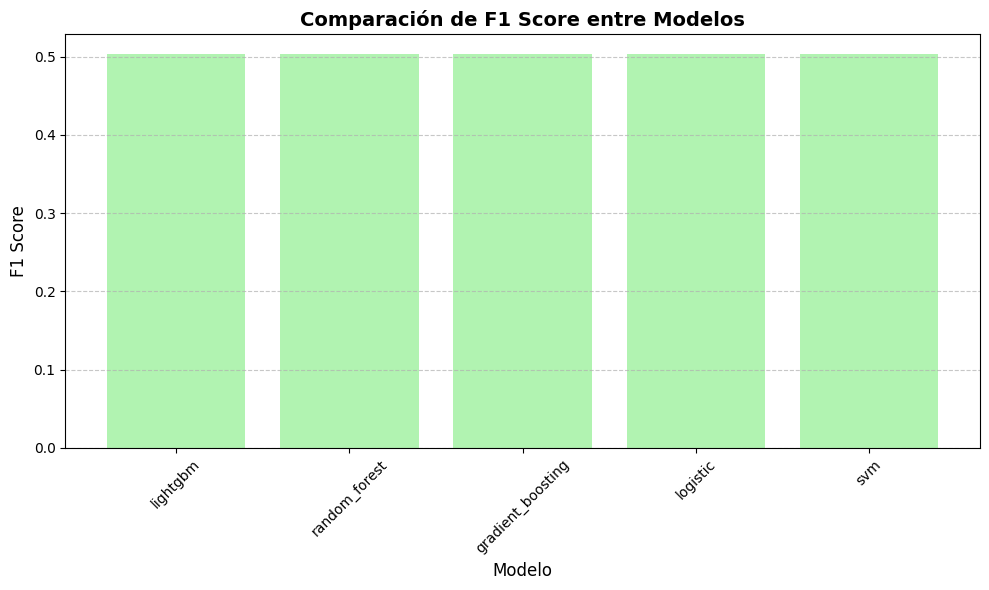

In [113]:
plt.figure(figsize=(10, 6))
if "F1_Score" in classification.columns:
    f1_data = classification.groupby("Model")["F1_Score"].agg(['mean', 'std']).sort_values('mean', ascending=False)
    plt.bar(f1_data.index, f1_data['mean'], yerr=f1_data['std'], capsize=5, alpha=0.7, color='lightgreen')
    plt.title("Comparación de F1 Score entre Modelos", fontsize=14, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=12)
    plt.xlabel("Modelo", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###Comparación de AUC-ROC

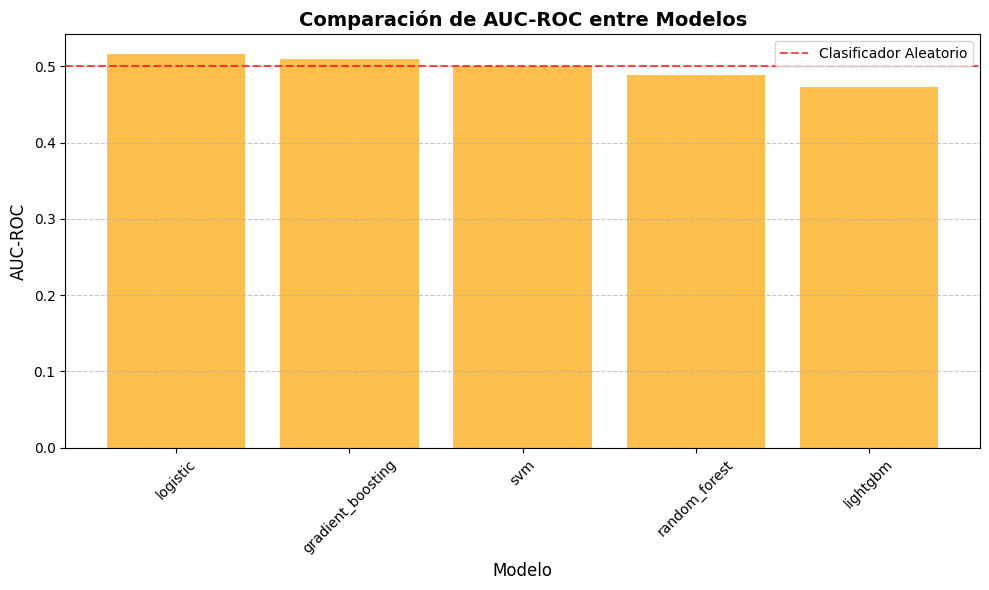

In [114]:
plt.figure(figsize=(10, 6))
if "AUC_ROC" in classification.columns:
    auc_data = classification.groupby("Model")["AUC_ROC"].agg(['mean', 'std']).sort_values('mean', ascending=False)
    plt.bar(auc_data.index, auc_data['mean'], yerr=auc_data['std'], capsize=5, alpha=0.7, color='orange')
    plt.title("Comparación de AUC-ROC entre Modelos", fontsize=14, fontweight='bold')
    plt.ylabel("AUC-ROC", fontsize=12)
    plt.xlabel("Modelo", fontsize=12)
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Clasificador Aleatorio')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###Heatmap de métricas

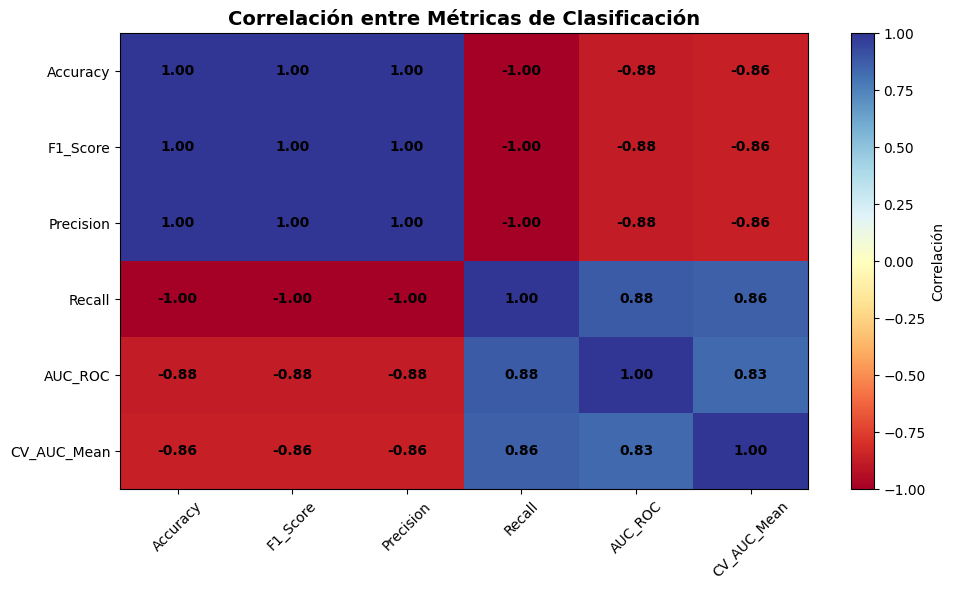

In [115]:
if len(available_metrics) >= 3:
    plt.figure(figsize=(10, 6))
    correlation_matrix = classification[available_metrics].corr()
    plt.imshow(correlation_matrix, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Correlación')
    plt.xticks(range(len(available_metrics)), available_metrics, rotation=45)
    plt.yticks(range(len(available_metrics)), available_metrics)
    plt.title("Correlación entre Métricas de Clasificación", fontsize=14, fontweight='bold')

    # Añadir valores de correlación
    for i in range(len(available_metrics)):
        for j in range(len(available_metrics)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                    ha='center', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

###Precision vs Recall scatter plot

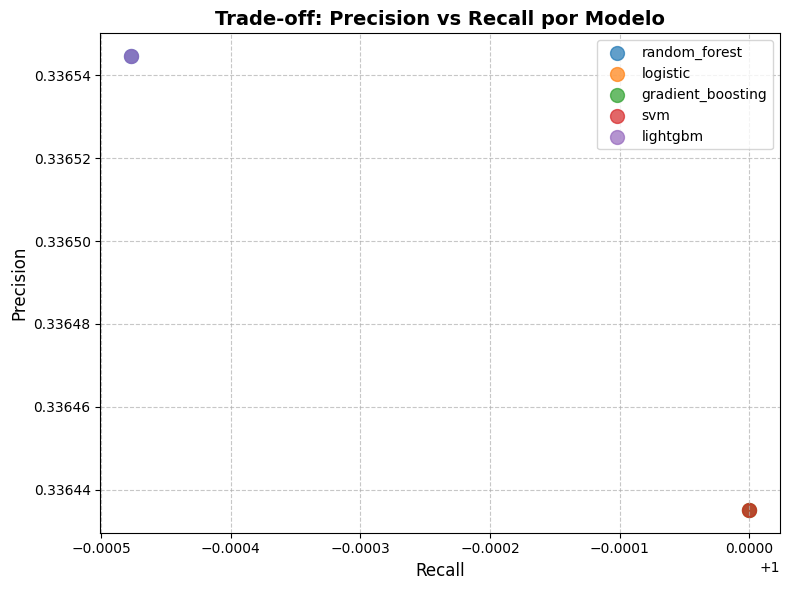

In [116]:
if all(metric in classification.columns for metric in ['Precision', 'Recall']):
    plt.figure(figsize=(8, 6))
    for model in classification['Model'].unique():
        model_data = classification[classification['Model'] == model]
        plt.scatter(model_data['Recall'].mean(), model_data['Precision'].mean(),
                   label=model, s=100, alpha=0.7)

    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Trade-off: Precision vs Recall por Modelo', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##Identificacion de mejores moddelos

###Buscar mejor modelo por F1 Score, AUC-ROC y CV AUC

In [117]:
#F1 Score
if "F1_Score" in classification.columns:
    best_f1_idx = classification["F1_Score"].idxmax()
    best_f1_model = classification.loc[best_f1_idx, "Model"]
    best_f1_score = classification.loc[best_f1_idx, "F1_Score"]
    print(f"🔹 Mejor modelo por F1 Score: {best_f1_model}")
    print(f"   F1 Score: {best_f1_score:.4f}")

#AUC-ROC
if "AUC_ROC" in classification.columns:
    best_auc_idx = classification["AUC_ROC"].idxmax()
    best_auc_model = classification.loc[best_auc_idx, "Model"]
    best_auc_score = classification.loc[best_auc_idx, "AUC_ROC"]
    print(f"\n🔹 Mejor modelo por AUC-ROC: {best_auc_model}")
    print(f"   AUC-ROC: {best_auc_score:.4f}")

#CV AUC
if "CV_AUC_Mean" in classification.columns:
    best_cv_idx = classification["CV_AUC_Mean"].idxmax()
    best_cv_model = classification.loc[best_cv_idx, "Model"]
    best_cv_score = classification.loc[best_cv_idx, "CV_AUC_Mean"]
    best_cv_std = classification.loc[best_cv_idx, "CV_AUC_Std"]
    print(f"\n🔹 Mejor modelo por Validación Cruzada: {best_cv_model}")
    print(f"   CV AUC: {best_cv_score:.4f} ± {best_cv_std:.4f}")

🔹 Mejor modelo por F1 Score: random_forest
   F1 Score: 0.5035

🔹 Mejor modelo por AUC-ROC: logistic
   AUC-ROC: 0.5160

🔹 Mejor modelo por Validación Cruzada: svm
   CV AUC: 0.5134 ± 0.0082


##Analisis de balance y threshulds

In [118]:
print("\n📊 BALANCE PRECISION-RECALL:")
if all(metric in classification.columns for metric in ['Precision', 'Recall']):
    balance_analysis = classification[['Model', 'Precision', 'Recall']].copy()
    balance_analysis['Precision-Recall Balance'] = balance_analysis['Precision'] - balance_analysis['Recall']
    balance_analysis['Balance Absoluto'] = abs(balance_analysis['Precision-Recall Balance'])

    # Identificar modelo más balanceado
    most_balanced_idx = balance_analysis['Balance Absoluto'].idxmin()
    most_balanced_model = balance_analysis.loc[most_balanced_idx, 'Model']

    print(f"🔹 Modelo más balanceado: {most_balanced_model}")
    print(f"   Diferencia Precision-Recall: {balance_analysis.loc[most_balanced_idx, 'Precision-Recall Balance']:.4f}")
    display(balance_analysis.round(4))


📊 BALANCE PRECISION-RECALL:
🔹 Modelo más balanceado: random_forest
   Diferencia Precision-Recall: -0.6630


,Model,Precision,Recall,Precision-Recall Balance,Balance Absoluto
0,random_forest,0.3365,0.9995,-0.6630,0.6630
1,logistic,0.3364,1.0000,-0.6636,0.6636
2,gradient_boosting,0.3364,1.0000,-0.6636,0.6636
3,svm,0.3364,1.0000,-0.6636,0.6636
4,lightgbm,0.3365,0.9995,-0.6630,0.6630


In [119]:
if "Best_Threshold" in classification.columns:
    print("\n🎯 ANÁLISIS DE THRESHOLDS ÓPTIMOS:")
    threshold_analysis = classification[['Model', 'Best_Threshold', 'Precision', 'Recall']].copy()
    threshold_analysis = threshold_analysis.sort_values('Best_Threshold', ascending=False)
    display(threshold_analysis.round(4))


🎯 ANÁLISIS DE THRESHOLDS ÓPTIMOS:


,Model,Best_Threshold,Precision,Recall
1,logistic,0.4870,0.3364,1.0000
3,svm,0.4669,0.3364,1.0000
2,gradient_boosting,0.4617,0.3364,1.0000
0,random_forest,0.4200,0.3365,0.9995
4,lightgbm,0.3828,0.3365,0.9995


##Evaluacion de calidad

In [120]:
print("\n📊 EVALUACIÓN DE CALIDAD POR AUC-ROC:")
if "AUC_ROC" in classification.columns:
    auc_scores = classification.groupby("Model")["AUC_ROC"].mean()

    for model, auc in auc_scores.items():
        if auc >= 0.9:
            rating = "Excelente 🏆"
        elif auc >= 0.8:
            rating = "Muy Bueno ⭐"
        elif auc >= 0.7:
            rating = "Bueno ✅"
        elif auc >= 0.6:
            rating = "Aceptable ⚠️"
        else:
            rating = "Pobre ❌"
        print(f"   {model}: {auc:.4f} - {rating}")


📊 EVALUACIÓN DE CALIDAD POR AUC-ROC:
   gradient_boosting: 0.5090 - Pobre ❌
   lightgbm: 0.4729 - Pobre ❌
   logistic: 0.5160 - Pobre ❌
   random_forest: 0.4891 - Pobre ❌
   svm: 0.5000 - Pobre ❌


In [121]:
print("\n💡 RECOMENDACIÓN PARA PRODUCCIÓN:")
if all(metric in classification.columns for metric in ['F1_Score', 'AUC_ROC', 'CV_AUC_Mean']):
    # Calcular score compuesto
    classification['Composite_Score'] = (
        classification['F1_Score'] * 0.4 +
        classification['AUC_ROC'] * 0.4 +
        classification['CV_AUC_Mean'] * 0.2
    )

    best_composite_idx = classification['Composite_Score'].idxmax()
    best_composite_model = classification.loc[best_composite_idx, 'Model']

    print(f"🔹 Modelo recomendado: {best_composite_model}")
    print(f"   Score compuesto: {classification.loc[best_composite_idx, 'Composite_Score']:.4f}")
    print(f"   • F1 Score: {classification.loc[best_composite_idx, 'F1_Score']:.4f}")
    print(f"   • AUC-ROC: {classification.loc[best_composite_idx, 'AUC_ROC']:.4f}")
    print(f"   • CV AUC: {classification.loc[best_composite_idx, 'CV_AUC_Mean']:.4f}")


💡 RECOMENDACIÓN PARA PRODUCCIÓN:
🔹 Modelo recomendado: logistic
   Score compuesto: 0.5104
   • F1 Score: 0.5035
   • AUC-ROC: 0.5160
   • CV AUC: 0.5132


In [122]:
print("\n🏆 MEJOR MODELO DE CLASIFICACIÓN Y JUSTIFICACIÓN")
print("=" * 50)

# Definir la métrica principal para clasificación
metrica_principal_clasificacion = "F1_Score"

# Encontrar el mejor modelo basado en F1 Score (la métrica más balanceada para clasificación)
if metrica_principal_clasificacion in classification.columns:
    mejor_modelo_clasificacion = classification.loc[classification[metrica_principal_clasificacion].idxmax()]

    print(f"🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: {mejor_modelo_clasificacion['Model']}")
    print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor F1 Score ({mejor_modelo_clasificacion[metrica_principal_clasificacion]:.4f})")
    print("\n📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:")
    print(f"   • F1 Score: {mejor_modelo_clasificacion['F1_Score']:.4f}")
    print(f"   • Precision: {mejor_modelo_clasificacion['Precision']:.4f}")
    print(f"   • Recall: {mejor_modelo_clasificacion['Recall']:.4f}")
    print(f"   • AUC-ROC: {mejor_modelo_clasificacion['AUC_ROC']:.4f}")
    if 'CV_AUC_Mean' in mejor_modelo_clasificacion:
        print(f"   • CV AUC: {mejor_modelo_clasificacion['CV_AUC_Mean']:.4f} ± {mejor_modelo_clasificacion['CV_AUC_Std']:.4f}")

    # Información adicional sobre el threshold óptimo si está disponible
    if 'Best_Threshold' in mejor_modelo_clasificacion:
        print(f"   • Threshold óptimo: {mejor_modelo_clasificacion['Best_Threshold']:.4f}")
else:
    # Fallback a AUC si F1 no está disponible
    if "AUC_ROC" in classification.columns:
        mejor_modelo_clasificacion = classification.loc[classification["AUC_ROC"].idxmax()]
        print(f"🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: {mejor_modelo_clasificacion['Model']}")
        print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor AUC-ROC ({mejor_modelo_clasificacion['AUC_ROC']:.4f})")
    else:
        print("⚠️ No se pudo determinar el mejor modelo - métricas principales no disponibles")


🏆 MEJOR MODELO DE CLASIFICACIÓN Y JUSTIFICACIÓN
🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: random_forest
📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor F1 Score (0.5035)

📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:
   • F1 Score: 0.5035
   • Precision: 0.3365
   • Recall: 0.9995
   • AUC-ROC: 0.4891
   • CV AUC: 0.4898 ± 0.0060
   • Threshold óptimo: 0.4200


##Conclusin

El modelo Random Forest se ha identificado como el mejor clasificador, alcanzando un F1 Score de 0.5035. Si bien este valor indica un rendimiento moderado, el modelo demuestra una capacidad notable para capturar casos positivos (Recall del 99.95%), aunque con una precisión limitada (33.65%). El AUC-ROC de 0.4891 sugiere que el modelo tiene una capacidad discriminativa cercana al azar, lo que indica margen para mejoras significativas.

La implementación debería considerar el threshold óptimo de 0.4200 para balancear mejor el trade-off entre Precision y Recall. Aunque el modelo supera a las alternativas evaluadas, se recomienda explorar técnicas adicionales de feature engineering y ajuste hiperparamétrico para elevar el rendimiento por encima del nivel de aceptabilidad actual.